In [1]:
import pandas as pd

In [2]:
car = pd.read_csv('quikr_car.csv')

In [3]:
car.head()
data = car.copy()

In [4]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [5]:
car.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

## Data cleaning
- year column has unnecessary text words
- year column has numeric data in string format so convert to int
- name has more than 3 words 
- Price column has unnecessary text instead of price, 
- price column has comma and string type
- kms_driven column has kms as attached string 
- kms_driven column has comma and string type value 
- kms_driven column has string value like petrol, 
- fule_type has nan value

In [6]:
car = car[car['year'].str.isnumeric()==True].reset_index(drop=True)

In [7]:
car['year']=car.year.astype(int)

In [8]:
car.name

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
2                  Maruti Suzuki Alto 800 Vxi
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
                        ...                  
837                      Toyota Corolla Altis
838                       Tata Zest XM Diesel
839                        Mahindra Quanto C8
840                  Honda Amaze 1.2 E i VTEC
841                 Chevrolet Sail 1.2 LT ABS
Name: name, Length: 842, dtype: object

In [9]:
car['name'] = car['name'].str.split(' ').str.slice(0,3)

In [10]:
car = car[car['Price'] !=  'Ask For Price']

In [11]:
car['Price'] = car['Price'].str.replace(',','').astype(int)

In [12]:
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0)

In [13]:
car['kms_driven'] = car['kms_driven'].str.replace(',','')

In [14]:
car = car[car['kms_driven'].str.isnumeric() == True]

In [15]:
car['kms_driven'] = car['kms_driven'].astype(int)

In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 839
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [17]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [18]:
car['fuel_type'] = car['fuel_type'].dropna()

In [19]:
car.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

In [20]:
car = car[~car['fuel_type'].isna()]

In [21]:
car.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [22]:
car

,name,company,year,Price,kms_driven,fuel_type
0,"[Hyundai, Santro, Xing]",Hyundai,2007,80000,45000,Petrol
1,"[Mahindra, Jeep, CL550]",Mahindra,2006,425000,40,Diesel
3,"[Hyundai, Grand, i10]",Hyundai,2014,325000,28000,Petrol
4,"[Ford, EcoSport, Titanium]",Ford,2014,575000,36000,Diesel
6,"[Ford, Figo]",Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
835,"[Maruti, Suzuki, Ritz]",Maruti,2011,270000,50000,Petrol
836,"[Tata, Indica, V2]",Tata,2009,110000,30000,Diesel
837,"[Toyota, Corolla, Altis]",Toyota,2009,300000,132000,Petrol
838,"[Tata, Zest, XM]",Tata,2018,260000,27000,Diesel


In [23]:
car['name'] = car['name'].str.join(' ')

In [24]:
car.fuel_type.unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [25]:
car.duplicated().sum()

96

In [26]:
car = car.reset_index(drop=True)

In [27]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [28]:
car = car[car['Price'] < 8e6].reset_index(drop=True)

In [29]:
import matplotlib.pyplot as plt

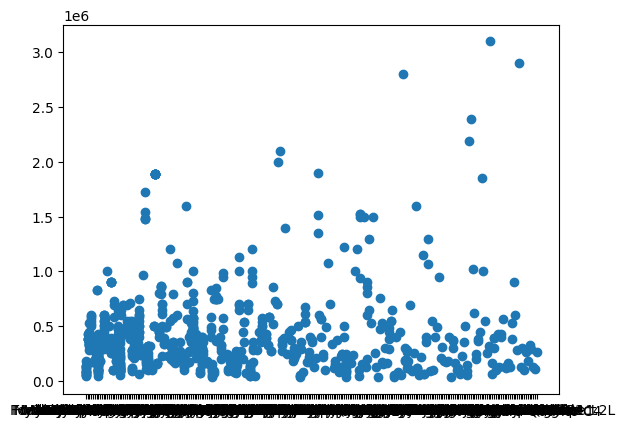

In [30]:
plt.scatter(car['name'],car['Price'])

In [31]:
car.to_csv('cleaned_car.csv')

## Model

In [32]:
X = car.drop(columns = 'Price')

In [33]:
y = car['Price']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [36]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [37]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']), remainder='passthrough')

In [38]:
lr = LinearRegression()
pipe=make_pipeline(column_trans,lr)

In [39]:
pipe.fit(X_train,y_train)

C:\Users\agust\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [40]:
y_pred = pipe.predict(X_test)

In [41]:
r2_score(y_test,y_pred)

0.7101310097835903

In [42]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [43]:
import numpy as np

In [44]:
np.argmax(scores)

433

In [45]:
scores[np.argmax(scores)]

0.8457059012561223

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8457059012561223

In [47]:
import pickle

In [49]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))